In [383]:
import pandas as pd
import math
from matplotlib import pyplot as plt

   CAPEX ($/kW H2) ;NGR with CCS;Pyrolysis;
0                              2020;1627;-;
1                              2021;1600;-;
2                              2022;1573;-;
3                              2023;1547;-;
4                              2024;1520;-;
5                              2025;1493;-;
6                              2026;1467;-;
7                              2027;1440;-;
8                              2028;1413;-;
9                              2029;1387;-;
10                             2030;1360;-;
11                             2031;1356;-;
12                             2032;1352;-;
13                             2033;1348;-;
14                             2034;1344;-;
15                           2035;1340;761;
16                           2036;1336;735;
17                           2037;1332;711;
18                           2038;1328;687;
19                           2039;1324;664;
20                           2040;1320;642;
21                           204

In [725]:
# read techno-economic assumptions for electrolyser technology
tea_el = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/tea_el.csv", delimiter= ';', decimal= ',')
tea_el


,Years,CAPEX ($/kW) Low temperature optimistic,CAPEX ($/kW) Low temperature baseline,CAPEX ($/kW) High temperature optimistic,CAPEX ($/kW) High temperature baseline,Effiency (%) Low temperature,Effiency (%) High temperature,Electrolyzer Characteristics (low & high temperature),Parameter
0,2020,500,950.00,2400,4000.0,0.67,0.78,Lifetime (years),25.00
1,2021,490,917.50,2240,3780.0,0.67,0.78,Interest rate (%),0.08
2,2022,480,885.00,2080,3560.0,0.67,0.78,Amortisation factor (%),0.09
3,2023,470,852.50,1920,3340.0,0.67,0.78,OPEX (in % of CAPEX/a),0.02
4,2024,460,820.00,1760,3120.0,0.67,0.79,LHV (kWh/kg H2),33.30
5,2025,450,787.50,1600,2900.0,0.67,0.79,NaN,NaN
6,2026,440,755.00,1440,2680.0,0.67,0.79,NaN,NaN
7,2027,430,722.50,1280,2460.0,0.68,0.80,NaN,NaN
8,2028,420,690.00,1120,2240.0,0.68,0.80,NaN,NaN
9,2029,410,657.50,960,2020.0,0.68,0.80,NaN,NaN


In [754]:
# Read LCOE in year y for RES class x
lcoe = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/lcoe.csv", delimiter = ';', decimal = ',')
lcoe

,Country,Electrolyzer,RES,RES ID,ID,Assumptions,2020,2021,2022,2023,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,United Arab Emirates,low_temp,Onshore,United_Arab_Emirates_Onshore_3,United_Arab_Emirates_Onshore_3_low_temp_baseline,baseline,5.453358,5.311494,5.186316,5.074230,...,3.786235,3.740592,3.696266,3.659454,3.567587,3.519349,3.473128,3.428752,3.386072,3.344954
1,United Arab Emirates,low_temp,Offshore_1,United_Arab_Emirates_Offshore_1,United_Arab_Emirates_Offshore_1_low_temp_baseline,baseline,9.344448,9.047272,8.799155,8.586133,...,6.103708,5.995255,5.894680,5.806272,5.668551,5.578630,5.494204,5.414592,5.339232,5.267657
2,United Arab Emirates,low_temp,Offshore_2,United_Arab_Emirates_Offshore_2,United_Arab_Emirates_Offshore_2_low_temp_baseline,baseline,13.222773,12.805721,12.457942,12.159713,...,8.661559,8.507494,8.364611,8.238998,8.043416,7.915664,7.795714,7.682597,7.575516,7.473810
3,United Arab Emirates,low_temp,PV,United_Arab_Emirates_PV_2,United_Arab_Emirates_PV_2_low_temp_baseline,baseline,1.982384,1.878558,1.793178,1.721023,...,1.081462,1.057951,1.035896,1.019052,0.979225,0.958095,0.938292,0.919668,0.902097,0.885472
4,United Arab Emirates,low_temp,PV,United_Arab_Emirates_PV_3,United_Arab_Emirates_PV_3_low_temp_baseline,baseline,2.092896,1.983550,1.893657,1.817707,...,1.142563,1.117834,1.094639,1.076945,1.034957,1.012724,0.991890,0.972297,0.953815,0.936329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,South Africa,low_temp,PV,South_Africa_PV_4,South_Africa_PV_4_low_temp_optimistic,optimistic,3.290437,3.073566,2.898980,2.754212,...,1.534300,1.490856,1.450385,1.419808,1.347033,1.309101,1.273795,1.240808,1.209878,1.180788
1656,South Africa,high_temp,Onshore,South_Africa_Onshore_3,South_Africa_Onshore_3_high_temp_optimistic,optimistic,4.491430,4.319534,4.166599,4.028378,...,2.775804,2.744852,2.714889,2.691744,2.616671,2.582300,2.549591,2.518391,2.488565,2.459996
1657,South Africa,high_temp,Offshore_1,South_Africa_Offshore_1,South_Africa_Offshore_1_high_temp_optimistic,optimistic,4.052635,3.875830,3.727361,3.599056,...,2.381863,2.338700,2.299159,2.265337,2.207279,2.172308,2.139818,2.109482,2.081034,2.054253
1658,South Africa,high_temp,Offshore_2,South_Africa_Offshore_2,South_Africa_Offshore_2_high_temp_optimistic,optimistic,5.435506,5.205045,5.012300,4.846400,...,3.244768,3.186136,3.132432,3.086515,3.007571,2.960078,2.915960,2.874774,2.836157,2.799807


In [757]:
lcoe_y = lcoe.at[502, '2020']
lcoe_y

2.233380441

In [741]:
# Electrolyser efficiency in year y
el_eff = tea_el.at[0,'Effiency (%) Low temperature']
el_eff

0.67

In [742]:
# Electrolyser capex in year y [$/kW]
el_capex = tea_el.at[0,'CAPEX ($/kW) Low temperature optimistic ']
el_capex

500

In [743]:
# Electrolyser opex in year y [$/kW/a]
el_opex =  el_capex * tea_el.at[3, 'Parameter']
el_opex

10.0

In [744]:
# Read optimised electrolyser capacity factors
el_cf = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/el_cf.csv", delimiter= ';', decimal= ',')
el_cf

,Country,Electrolyzer,RES,RES ID,ID,Assumptions,Potential (GW),original CF,Unnamed: 8,2020,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,United Arab Emirates,low_temp,Onshore,United_Arab_Emirates_Onshore_3,United_Arab_Emirates_Onshore_3_low_temp_baseline,baseline,122,0.22,NaN,0.378718,...,0.351338,0.350639,0.349940,0.349241,0.348542,0.347843,0.347144,0.346445,0.345747,0.345048
1,United Arab Emirates,low_temp,Offshore_1,United_Arab_Emirates_Offshore_1,United_Arab_Emirates_Offshore_1_low_temp_baseline,baseline,70,0.19,NaN,0.290421,...,0.277857,0.277652,0.277446,0.277241,0.277036,0.276830,0.276625,0.276420,0.276214,0.276009
2,United Arab Emirates,low_temp,Offshore_2,United_Arab_Emirates_Offshore_2,United_Arab_Emirates_Offshore_2_low_temp_baseline,baseline,31,0.19,NaN,0.268904,...,0.258346,0.258055,0.257765,0.257474,0.257184,0.256893,0.256603,0.256312,0.256022,0.255731
3,United Arab Emirates,low_temp,PV,United_Arab_Emirates_PV_2,United_Arab_Emirates_PV_2_low_temp_baseline,baseline,30,0.22,NaN,0.307469,...,0.305253,0.305222,0.305191,0.305159,0.305128,0.305097,0.305065,0.305034,0.305003,0.304972
4,United Arab Emirates,low_temp,PV,United_Arab_Emirates_PV_3,United_Arab_Emirates_PV_3_low_temp_baseline,baseline,335,0.21,NaN,0.297617,...,0.295639,0.295639,0.295639,0.295639,0.295639,0.295639,0.295639,0.295639,0.295639,0.295639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,South Africa,low_temp,PV,South_Africa_PV_4,South_Africa_PV_4_low_temp_optimistic,optimistic,24657,0.14,NaN,0.218679,...,0.223088,0.222543,0.221998,0.221453,0.220908,0.220363,0.219818,0.219273,0.218728,0.218183
1656,South Africa,high_temp,Onshore,South_Africa_Onshore_3,South_Africa_Onshore_3_high_temp_optimistic,optimistic,424,0.23,NaN,0.542743,...,0.444135,0.442941,0.441748,0.440554,0.439361,0.438167,0.436974,0.435780,0.434587,0.433393
1657,South Africa,high_temp,Offshore_1,South_Africa_Offshore_1,South_Africa_Offshore_1_high_temp_optimistic,optimistic,11,0.44,NaN,0.565059,...,0.503755,0.503188,0.502621,0.502054,0.501488,0.500921,0.500354,0.499787,0.499221,0.498654
1658,South Africa,high_temp,Offshore_2,South_Africa_Offshore_2,South_Africa_Offshore_2_high_temp_optimistic,optimistic,28,0.44,NaN,0.546799,...,0.492788,0.492184,0.491580,0.490976,0.490371,0.489767,0.489163,0.488559,0.487955,0.487350


In [745]:
# Optimised electrolyser capacity factor in year y
el_cf_y = el_cf.at[0, '2020']
el_cf_y

0.378718207

In [761]:
LHV_h2

33.33

In [762]:
# Calculate LCOH from RES in year y
lcoh_res = LHV_h2 * ((alpha * el_capex + el_opex + lcoe_y)/(el_cf_y * 8760))
lcoh_res

0.5569117572352852

In [705]:
# Define function to calculate LCOH from RES in year y

def calculate_lcoh_res():
   lcoh_res = LHV_h2*((alpha * el_capex + el_opex)/CF * 8760 + P_ng/n)

print('The cost of hydrogen production from RES' + 'in year ' + str(round(lcoh_res,2)) + ' [$/kg_h2]')
calculate_lcoh_res()

NameError: name 'lcoh_res' is not defined

In [698]:
# read Capex for NGR in  year y
ngr_time_inputs = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/ngr_time_inputs.csv")
print(ngr_time_inputs)

   CAPEX ($/kW H2) ;NGR with CCS;Pyrolysis
0                              2020;1627;-
1                              2021;1600;-
2                              2022;1573;-
3                              2023;1547;-
4                              2024;1520;-
5                              2025;1493;-
6                              2026;1467;-
7                              2027;1440;-
8                              2028;1413;-
9                              2029;1387;-
10                             2030;1360;-
11                             2031;1356;-
12                             2032;1352;-
13                             2033;1348;-
14                             2034;1344;-
15                           2035;1340;761
16                           2036;1336;735
17                           2037;1332;711
18                           2038;1328;687
19                           2039;1324;664
20                           2040;1320;642
21                           2041;1316;620
22         

In [711]:
#read techno-economic assumptions for hydrogen production from NG
tea_ngr = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/tea_ngr.csv", delimiter= ';', decimal= ',')
tea_ngr

,Techno-economic assumptions,NGR with CCS,Pyrolysis
0,Lifetime (years),25.000,25.00
1,Interest rate (%),0.080,0.08
2,Amortisation factor,0.090,0.09
3,OPEX (% of CAPEX/a),0.030,0.05
4,Efficiency (%),0.690,0.52
5,Availability (%),0.950,0.95
6,Captured emissions (kgCO2/kgH2),8.700,NaN
7,Leaked emissions (kgCO2/kgH2),1.000,NaN
8,Carbon yield (kg/kg H2),3.000,NaN
9,Gas price ($/kWh),0.262,NaN


In [ ]:
#Select with Nor with.loc

In [213]:
nor = lcoe.loc[503,2020:2050]
nor

2020    2.785949
2021    2.714871
2022    2.652284
2023    2.596362
2024    2.545803
2025    2.499648
2026    2.457171
2027    2.417811
2028    2.381122
2029    2.346749
2030    2.314401
2031    2.264631
2032    2.226766
2033    2.190359
2034    2.155485
2035    2.122516
2036    2.090301
2037    2.059023
2038     2.03067
2039    2.002053
2040    1.973398
2041    1.948791
2042    1.925478
2043    1.902839
2044    1.884067
2045    1.836945
2046    1.812282
2047    1.788654
2048    1.765974
2049    1.744164
2050    1.723156
Name: 503, dtype: object

In [ ]:
#Select years

In [699]:
years = lcoe.loc[1,2020:2050]
years

2020    9.344448
2021    9.047272
2022    8.799155
2023    8.586133
2024    8.399404
2025    8.233071
2026    8.083001
2027     7.94619
2028    7.820385
2029    7.703856
2030    7.595249
2031    7.385286
2032    7.204698
2033    7.043249
2034      6.8967
2035    6.762435
2036    6.639606
2037    6.523901
2038    6.415678
2039    6.315508
2040    6.217864
2041    6.103708
2042    5.995255
2043     5.89468
2044    5.806272
2045    5.668551
2046     5.57863
2047    5.494204
2048    5.414592
2049    5.339232
2050    5.267657
Name: 1, dtype: object

In [ ]:
#Shor Nor

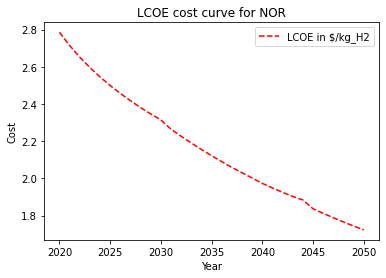

In [224]:
plt.plot(nor, color = 'red', linestyle = 'dashed')
plt.title('LCOE cost curve for NOR')
plt.legend(['LCOE in $/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

In [215]:
#find max lcoe in nor

In [223]:
nor.max(axis = 0)

2.785948657162366

In [225]:
#Define variables for LCOH calculation

In [255]:
year = int(input())
year

2020

,Techno-economic assumptions,NGR with CCS,Pyrolysis
0,Lifetime (years),25,25
1,Interest rate (%),"0,08","0,08"
2,Amortisation factor,"0,09","0,09"
3,OPEX (% of CAPEX/a),"0,03","0,05"
4,Efficiency (%),"0,69","0,52"
5,Availability (%),"0,95","0,95"
6,Captured emissions (kgCO2/kgH2),"8,7",-
7,Leaked emissions (kgCO2/kgH2),1,-
8,Carbon yield (kg/kg H2),-,3
9,Gas price ($/MWh),NaN,25


In [404]:
ngr_time_inputs = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/ngr_time_inputs.csv", sep=';')
ngr_time_inputs

,CAPEX ($/kW H2),NGR with CCS,Pyrolysis
0,2020,1627,-
1,2021,1600,-
2,2022,1573,-
3,2023,1547,-
4,2024,1520,-
5,2025,1493,-
6,2026,1467,-
7,2027,1440,-
8,2028,1413,-
9,2029,1387,-


In [695]:
tea_ngr = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/techno_economics.csv", sep = ';', decimal=",")
tea_ngr



,Techno-economic assumptions,NGR with CCS,Pyrolysis
0,Lifetime (years),25.000,25.00
1,Interest rate (%),0.080,0.08
2,Amortisation factor,0.090,0.09
3,OPEX (% of CAPEX/a),0.030,0.05
4,Efficiency (%),0.690,0.52
5,Availability (%),0.950,0.95
6,Captured emissions (kgCO2/kgH2),8.700,NaN
7,Leaked emissions (kgCO2/kgH2),1.000,NaN
8,Carbon yield (kg/kg H2),3.000,NaN
9,Gas price ($/kWh),0.262,NaN


Techno-economic assumptions     object
NGR with CCS                   float64
Pyrolysis                      float64
dtype: object

In [672]:
# Interest rate (WACC) in %
i = (tea_ngr.at[1,'NGR with CCS'])
i

0.08

In [674]:
# Economic lifetime of the plant in years
l = (tea_ngr.at[0,'NGR with CCS'])
l

25.0

In [685]:
# Calculate the amortisation factor alpha
alpha = (i * (1 + i)**l)/(1 + i)**(l - 1)
round(alpha,2)

0.09

In [622]:
# Capital expenditures in $/kW in year y
year_in = int(input())
year = year_in - 2020
year
capex_y = ngr_time_inputs.at[year ,'NGR with CCS']
capex_y

1627

In [687]:
# Operational expenditures in $/kW/a in year y
opex_y = (tea_ngr.at[3,'NGR with CCS'])*capex_y
round(opex_y, 2)


48.81

In [525]:
# Capacity factor as the availability of the plant in %
CF = tea_ngr.at[5, 'NGR with CCS']
CF

0.95

In [692]:
# Natual gas price in year y in $/kWh
# maybe make projections on NG price development
#P_ng = tea_ngr.at[9,'NGR with CCS']
P_ng = 0.262

In [646]:
# Plant efficiency
n = tea_ngr.at[4,'NGR with CCS']
n

0.69

In [647]:
# Quantity of captured emissions in kg_CO2/kg_H2
Q_ce = tea_ngr.at[6,'NGR with CCS']
Q_ce

8.7

In [648]:
# Quantity of uncaptured emissions in kg_CO2/kg_H2
Q_ue = tea_ngr.at[7,'NGR with CCS']
Q_ue

1.0

In [649]:
# P_ccs is the cost for transporting and storing CO2 in $/t_co2
P_ccs = tea_ngr.at[10,'NGR with CCS']
P_ccs

20.0

In [650]:
# Price for CO2 in year y in $/t_co2
P_co2 = tea_ngr.at[11,'NGR with CCS']
P_co2

150.0

In [651]:
# LHV of hydrogen is 33.33 kWh/kg
LHV_h2 = tea_ngr.at[13,'NGR with CCS']
LHV_h2

33.33

In [652]:
# Calculate LCOH_ngr [$/kg_h2] in year y

In [693]:
lcoh_ngr_y = LHV_h2*((alpha * capex_y + opex_y)/(CF * 8760) + 0.262/n) + (Q_ce * P_ccs + Q_ue * P_co2)/1000
lcoh_ngr_y

13.738226119620075

In [694]:
def calculate_lcoh_ngr():
    lcoh_ngr_y = LHV_h2*((alpha * capex_y + opex_y)/CF * 8760 + P_ng/n) + (Q_ce * P_ccs + Q_ue * P_co2)/1000

print('The cost of hydrogen production from NG' + 'in year ' + str(round(lcoh_ngr_y,2)) + ' [$/kg_h2]')
calculate_lcoh_ngr()

The cost of hydrogen production from NGin year 13.74 [$/kg_h2]


In [ ]:
# Time relevant variables = capex, opex, P_ng, P_co2
def calculate_lcoh_ngr(alpha, capex_y, opex_y, CF, P_ng, n, Q_ce, P_ccs, Q_ue, P_co2, LHV_h2):
    result = (LHV_h2 * ((alpha * capex_y + opex_y) / (CF * 8760) + P_ng / n) + (Q_ce * P_ccs + Q_ue * P_co2) / 1000)

    return result


#// Cost curve calculation


initial_data = {'capex': [1, 4, 6, 87, 4],

                'opex': [12, 52, 36, 85, 23]}

df = pd.DataFrame(initial_data, columns=['capex', 'opex'])
print(df)
x = df.capex[3]
x
y = df.opex[3]
y


def sum(x, y):
    return x + y


z = sum(x, y)
print(z)

for i, z in df.iterrows():
    #z = sum(x,y)
    print(z['capex'])

print(df)
lcoh_test = ngr_time_inputs['Capex ($/kW ) NGR with CCS'].apply(test)
print(ngr_time_inputs)
capex_y = (ngr_time_inputs[ngr_time_inputs.Years == year]['Capex ($/kW ) NGR with CCS'].values)
capex_y
ngr_time_inputs.iterrows()
for x in ngr_time_inputs.iterrows():
    x = (ngr_time_inputs['Capex ($/kW ) NGR with CCS'].values)
    print(x)
#iterrate through each row?!
for row in ngr_time_inputs.iterrows():
    print
    row[Capex($/ kW ) NGR with CCS]
# Capital expenditures in $/kW in year y
capex_y = float(ngr_time_inputs[ngr_time_inputs.Years == 2020]['Capex ($/kW ) NGR with CCS'].values)
capex_y


# apply function to each row?!
def print_row(r):
    print
    r['Date']


df.apply(print_row, axis=1)

# Opex share  in % of Capex per year
opex_share = float(tea_ngr[tea_ngr.H2_NGR == 'OPEX (% of CAPEX/a)']['NGR with CCS'].values)
opex_share
# Operational expenditures in $/kW/a in year y
opex_y = opex_share * capex_y
opex_y
for n in y()
